In [12]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import random 

import sklearn 
from sklearn import metrics
from sklearn.cluster import KMeans

%matplotlib inline

Simple KMeans Clustering Using Random Data

In [5]:
sklearn.__version__

'1.0.2'

In [12]:
a1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], dtype=np.float64)
a2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], dtype=np.float64)
a3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], dtype=np.float64)

data = np.append(np.append(a1,a2,axis=0), a3, axis=0)

In [13]:
data.shape

(150, 2)

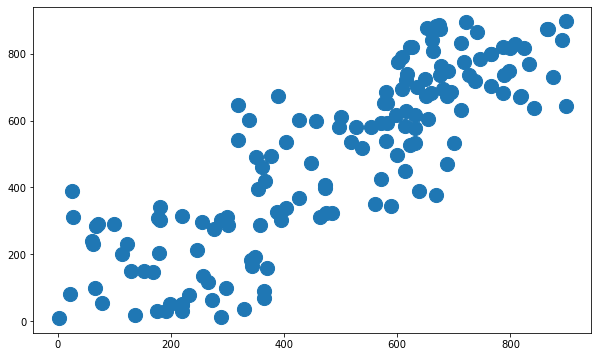

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(data[:,0], data[:,1], s=200)

In [19]:
label_1 = np.array([0 for i in range(50)])
label_2 = np.array([1 for i in range(50)])
label_3 = np.array([2 for i in range(50)])

labels = np.append(np.append(label_1,label_2, axis=0), label_3,axis=0)

In [25]:
df = pd.DataFrame({
    'data_x' : data[:,0], 
    'data_y' : data[:,1], 
    'labels': labels})
df.sample(2)

,data_x,data_y,labels
28,122.0,231.0,0
146,649.0,725.0,2


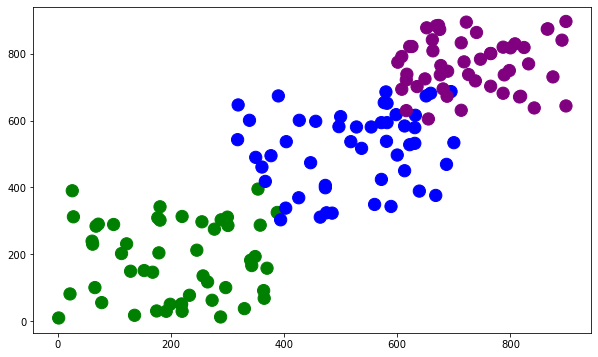

In [32]:
colors = ['green', 'blue', 'purple']
plt.figure(figsize=(10,6))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=150,
            cmap=matplotlib.colors.ListedColormap(colors))

In [33]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

In [34]:
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
centroids = kmeans_model.cluster_centers_
centroids

array([[718.24561404, 755.84210526],
       [201.41666667, 171.91666667],
       [499.6       , 485.33333333]])

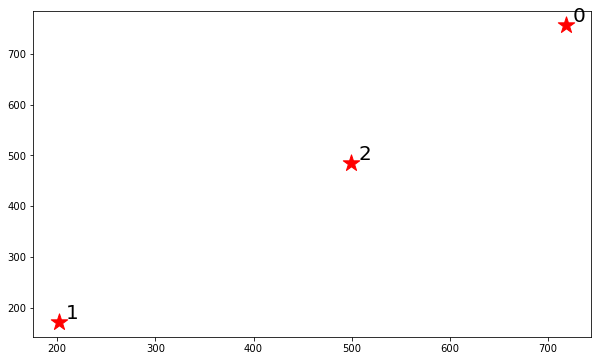

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='*', s=300)
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0]+7,centroids[i][1]+7), fontsize=20)

In [41]:
print("Homogeneity score          = ", metrics.homogeneity_score(labels, kmeans_model.labels_) )
print("Completeness score         = ", metrics.completeness_score(labels, kmeans_model.labels_) )
print("V Measure score            = ", metrics.v_measure_score(labels, kmeans_model.labels_) )
print("Adjusted rand score        = ", metrics.adjusted_rand_score(labels, kmeans_model.labels_) )
print("Adjusted Mutual Info score = ", metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_) )
print("Silhouette score           = ", metrics.silhouette_score(data, kmeans_model.labels_) )

Homogeneity score          =  0.8215123208379239
Completeness score         =  0.8253585016016473
V Measure score            =  0.823430919942672
Adjusted rand score        =  0.831589073921049
Adjusted Mutual Info score =  0.8212154666367046
Silhouette score           =  0.49677299961358784


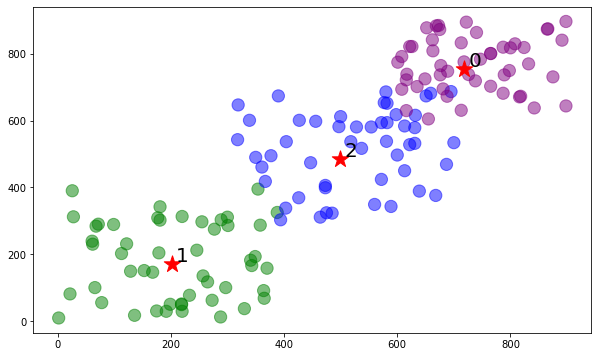

In [50]:
colors = ['green', 'blue', 'purple']
plt.figure(figsize=(10,6))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=150,alpha=0.5,
            cmap=matplotlib.colors.ListedColormap(colors))

plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='*', s=300)
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0]+7,centroids[i][1]+7), fontsize=20)

In [51]:
data_test = np.array([[442.,621.],
                      [50.,153.],
                      [333.,373.],
                      [835.,816.]])

In [56]:
label_pred = kmeans_model.predict(data_test)

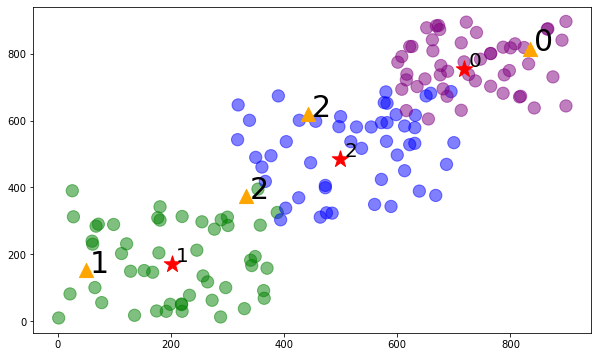

In [61]:
colors = ['green', 'blue', 'purple']
plt.figure(figsize=(10,6))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=150,alpha=0.5,
            cmap=matplotlib.colors.ListedColormap(colors))

plt.scatter(centroids[:,0], centroids[:,1], c='r', marker='*', s=300)
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0]+7,centroids[i][1]+7), fontsize=20)
    
plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=200, marker='^')
for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0]+7,data_test[i][1]-7), fontsize=30)